<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU18_Infraestructuras_eventos</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.- EDA - Exploratory Data Analysis</font>

## <font color='steelblue'>Tasks</font>

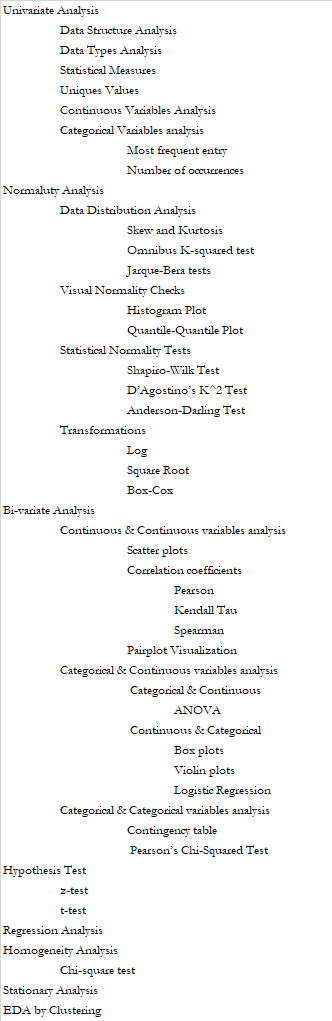
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_18_09.3_20_diario_infra</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_CTYPE=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8;LC_COLLATE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_ES.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=es_ES.UTF-8;LC_IDENTIFICATION=C"

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
# library(sf)
library(tidyr)
library(ggplot2)
# library(summarytools)
library(GGally)
library(nortest)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_18_09.3_20_diario_infra.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_18_09.3_20_diario_infra.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 377727 Columns: 10
── Column specification ──────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (9): id_inf, capacidad, demanda, evento_infra, evento_zona, tmed, prec,...
date (1): fecha

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Structure

Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 377,727
Columns: 10
$ id_inf       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ fecha        <date> 2019-01-01, 2019-01-01, 2019-01-01, 2019-01-01, 2019-01-…
$ capacidad    <dbl> 993, 996, 1036, 1020, 992, 1026, 1007, 976, 1037, 972, 94…
$ demanda      <dbl> 883, 888, 922, 1134, 1103, 1139, 897, 1086, 1150, 861, 83…
$ evento_infra <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, …
$ evento_zona  <dbl> 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, …
$ tmed         <dbl> 6.953211, 6.196420, 6.483569, 5.875797, 6.212680, 5.87854…
$ prec         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ velmedia     <dbl> 0.6433886, 0.3417523, 0.4132169, 0.1820178, 0.2118110, 0.…
$ presMax      <dbl> 952.9357, 950.2191, 950.8051, 951.6768, 953.5118, 952.168…


Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

id_inf,fecha,capacidad,demanda,evento_infra,evento_zona,tmed,prec,velmedia,presMax
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-01-01,993,883,1,1,6.953211,0,0.6433886,952.9357
2,2019-01-01,996,888,0,0,6.196420,0,0.3417523,950.2191
3,2019-01-01,1036,922,0,0,6.483569,0,0.4132169,950.8051
4,2019-01-01,1020,1134,1,0,5.875797,0,0.1820178,951.6768
5,2019-01-01,992,1103,1,1,6.212680,0,0.2118110,953.5118


**Tamaño de Memoria** de los datos

In [9]:
object.size(data)

30227008 bytes

**Structure of non-numerical features**

In [10]:
# Display non-numerical features
# Identify non-numerical columns
non_numeric_cols <- sapply(data, function(x) !is.numeric(x))

# Get the names of non-numerical columns
non_numeric_cols <- names(data)[non_numeric_cols]

# Print the non-numerical columns
print(non_numeric_cols)

[1] "fecha"


**Structure of numerical features**

In [11]:
# Identify numerical columns
numeric_cols <- sapply(data, is.numeric)

# Subset the dataframe to include only numerical columns
numeric_data <- data[, numeric_cols]

# Display the structure of numerical features
str(numeric_data)


tibble [377,727 × 9] (S3: tbl_df/tbl/data.frame)
 $ id_inf      : num [1:377727] 1 2 3 4 5 6 7 8 9 10 ...
 $ capacidad   : num [1:377727] 993 996 1036 1020 992 ...
 $ demanda     : num [1:377727] 883 888 922 1134 1103 ...
 $ evento_infra: num [1:377727] 1 0 0 1 1 0 0 1 1 0 ...
 $ evento_zona : num [1:377727] 1 0 0 0 1 1 0 0 1 1 ...
 $ tmed        : num [1:377727] 6.95 6.2 6.48 5.88 6.21 ...
 $ prec        : num [1:377727] 0 0 0 0 0 0 0 0 0 0 ...
 $ velmedia    : num [1:377727] 0.643 0.342 0.413 0.182 0.212 ...
 $ presMax     : num [1:377727] 953 950 951 952 954 ...


## Data Types

**Tipo** de datos

In [12]:
sapply(data, class)
glimpse(data)

id_inf        fecha    capacidad      demanda evento_infra  evento_zona 
   "numeric"       "Date"    "numeric"    "numeric"    "numeric"    "numeric" 
        tmed         prec     velmedia      presMax 
   "numeric"    "numeric"    "numeric"    "numeric"

Rows: 377,727
Columns: 10
$ id_inf       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ fecha        <date> 2019-01-01, 2019-01-01, 2019-01-01, 2019-01-01, 2019-01-…
$ capacidad    <dbl> 993, 996, 1036, 1020, 992, 1026, 1007, 976, 1037, 972, 94…
$ demanda      <dbl> 883, 888, 922, 1134, 1103, 1139, 897, 1086, 1150, 861, 83…
$ evento_infra <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, …
$ evento_zona  <dbl> 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, …
$ tmed         <dbl> 6.953211, 6.196420, 6.483569, 5.875797, 6.212680, 5.87854…
$ prec         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ velmedia     <dbl> 0.6433886, 0.3417523, 0.4132169, 0.1820178, 0.2118110, 0.…
$ presMax      <dbl> 952.9357, 950.2191, 950.8051, 951.6768, 953.5118, 952.168…


## Statistical Measures

In [13]:
# Identify numeric columns
numeric_cols <- sapply(data, is.numeric)

# Loop through numeric columns and calculate statistics
for (column in names(data)[numeric_cols]) {
  cat("Statistical Measures for", column, ":\n")
  cat("Mean:", mean(data[[column]], na.rm = TRUE), "\n")
  cat("Median:", median(data[[column]], na.rm = TRUE), "\n")
  cat("Standard Deviation:", sd(data[[column]], na.rm = TRUE), "\n")
  cat("Minimum:", min(data[[column]], na.rm = TRUE), "\n")
  cat("Maximum:", max(data[[column]], na.rm = TRUE), "\n")
  cat("25th Percentile:", quantile(data[[column]], 0.25, na.rm = TRUE), "\n")
  cat("50th Percentile (Median):", quantile(data[[column]], 0.5, na.rm = TRUE), "\n")
  cat("75th Percentile:", quantile(data[[column]], 0.75, na.rm = TRUE), "\n\n")
}




Statistical Measures for id_inf :
Mean: 569.593 
Median: 570 
Standard Deviation: 328.4805 
Minimum: 1 
Maximum: 1138 
25th Percentile: 285 
50th Percentile (Median): 570 
75th Percentile: 854 

Statistical Measures for capacidad :
Mean: 999.8897 
Median: 1000 
Standard Deviation: 31.65462 
Minimum: 851 
Maximum: 1147 
25th Percentile: 978 
50th Percentile (Median): 1000 
75th Percentile: 1021 

Statistical Measures for demanda :
Mean: 999.921 
Median: 999 
Standard Deviation: 114.4421 
Minimum: 757 
Maximum: 1268 
25th Percentile: 890 
50th Percentile (Median): 999 
75th Percentile: 1110 

Statistical Measures for evento_infra :
Mean: 0.5002025 
Median: 1 
Standard Deviation: 0.5000006 
Minimum: 0 
Maximum: 1 
25th Percentile: 0 
50th Percentile (Median): 1 
75th Percentile: 1 

Statistical Measures for evento_zona :
Mean: 0.4996889 
Median: 0 
Standard Deviation: 0.5000006 
Minimum: 0 
Maximum: 1 
25th Percentile: 0 
50th Percentile (Median): 0 
75th Percentile: 1 

Statistical Measu

## Uniques values

In [14]:
# Rthe number of unique values in each column.
data |> summarise(across(everything(), n_distinct))

id_inf,fecha,capacidad,demanda,evento_infra,evento_zona,tmed,prec,velmedia,presMax
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1138,332,265,483,2,2,376196,157761,370376,375928


## CrossTab

<font color='tomato'>Select columns</font>


Hacer los cruces que tengan sentido

In [15]:
# data |> select(where(~ !is.numeric(.x))) |> colnames()
# Column1 <- "presMax"
# Column2 <- "velmedia"

<font color='darkgrey'><b>Operation</font>

In [16]:
# Referencia cruzada de variables
# ctable(data[[Column1], data[[Column2]])

##	Analyzing Numerical Variables 

### Selecting continuous variables

In [17]:
# Numeric colums
cdata <- data |> select(where(is.numeric))

### Global view of the numerical variables

Global view on the dataset to identify some very unusual patterns.

NOTA: Esto puede tardar si hay muchas variables

In [18]:
# pairs(cdata)
# cdata |> ggpairs()

### Histograms

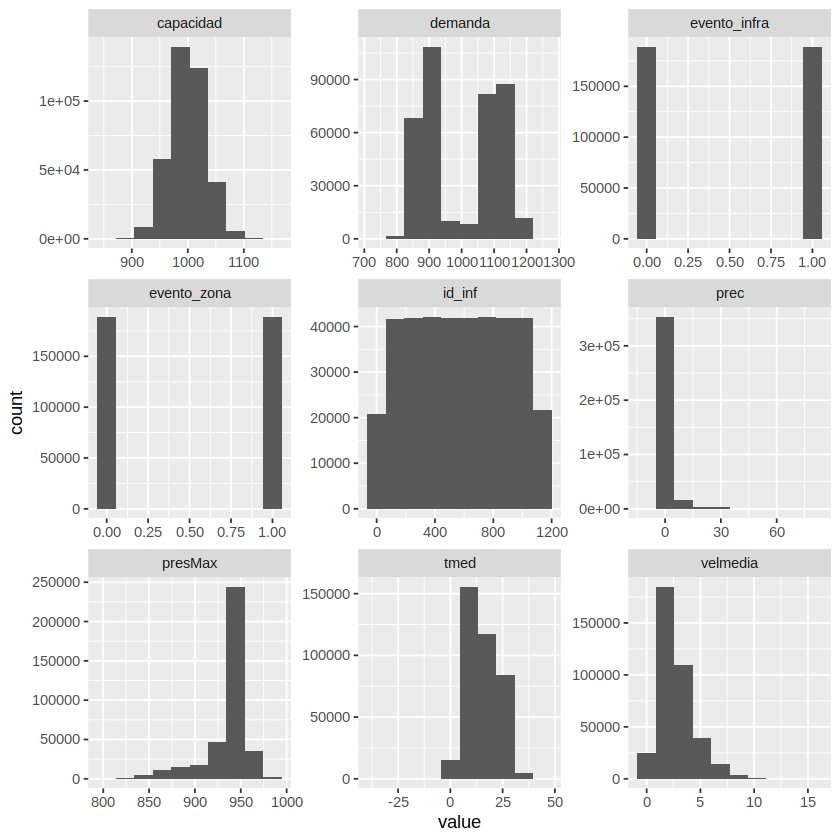

In [19]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~name, scales = "free")

### Box plot 

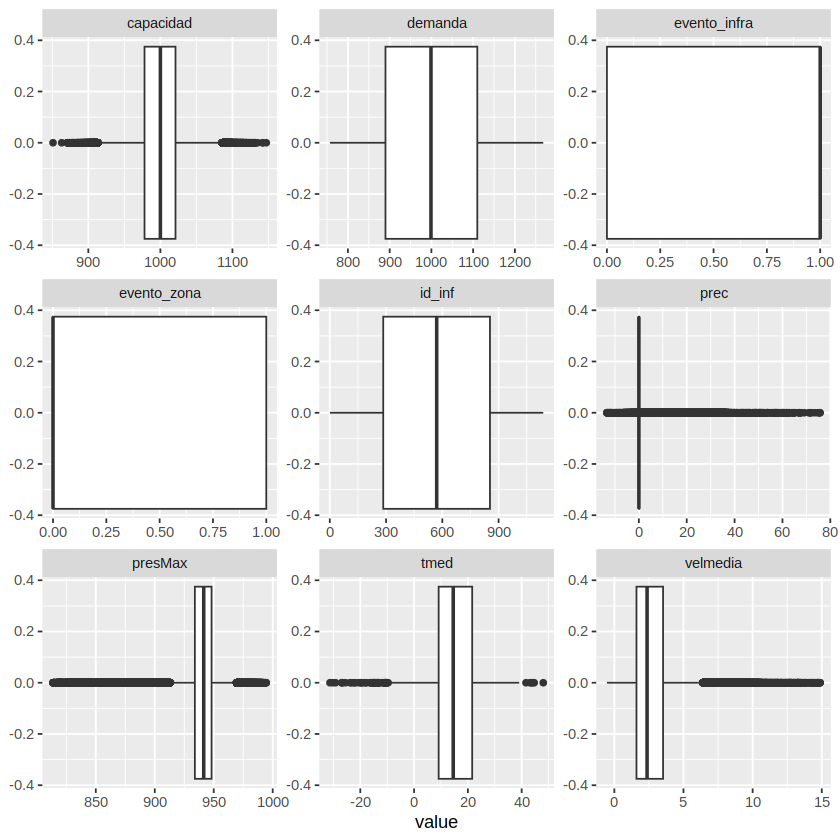

In [20]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_boxplot() +
  facet_wrap(~name, scales = "free")

### Violin plot 

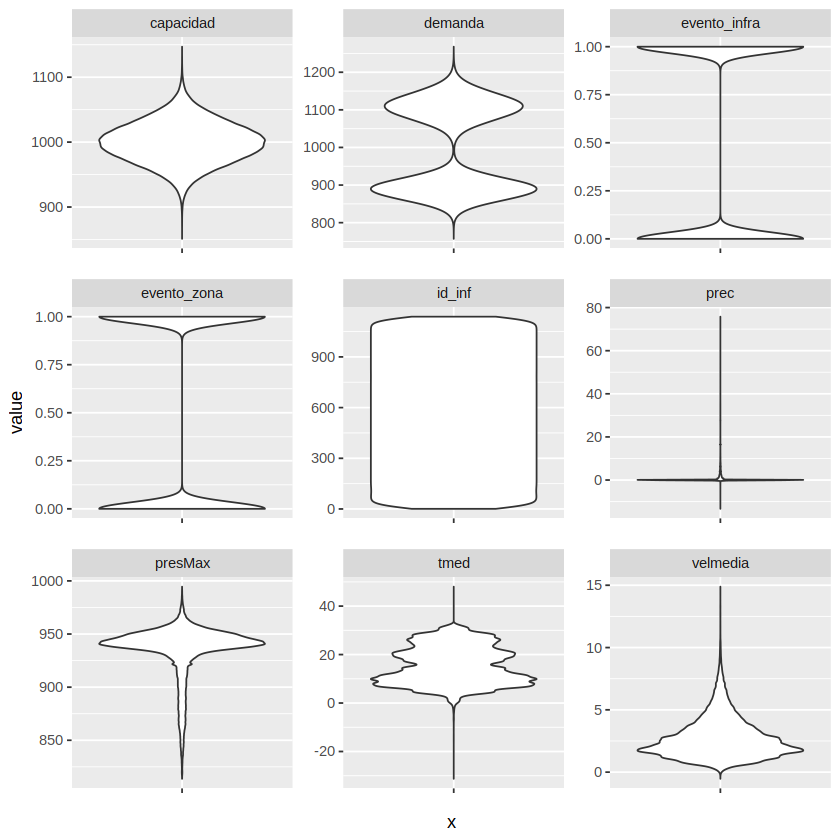

In [21]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = "", y = value)) +
  geom_violin() +
  facet_wrap(~name, scales = "free")

### Distribution plot 

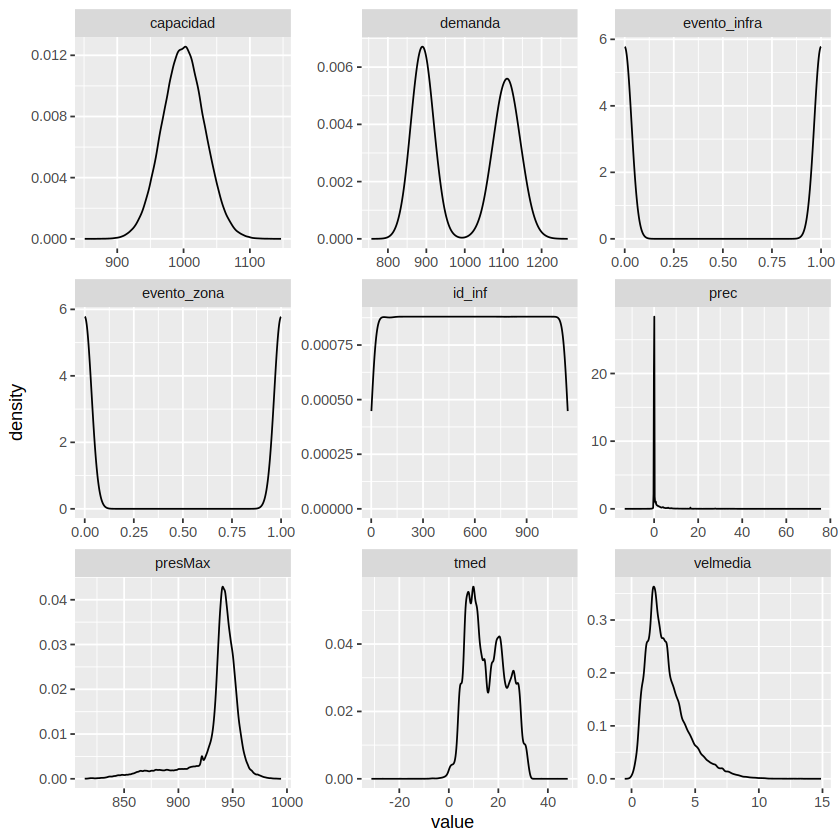

In [22]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_density() +
  facet_wrap(~name, scales = "free")

##	Analyzing Categorical Variables 

### Selecting categorical variables

In [23]:
# Category colums
char_cols <- data |> select(where(~ !is.numeric(.x))) |> colnames()
char_cols

[1] "fecha"

In [24]:
# Category colums
char_data <- data |> select(where(~ !is.numeric(.x))) 
char_data

fecha
<date>
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01


### Most frequent entry

* Ver salida de `summarytools::freq()` arriba

In [25]:
# Calculate and visualizate the ratio of the most frequent entry for each feature


### Visualization of categorical variables

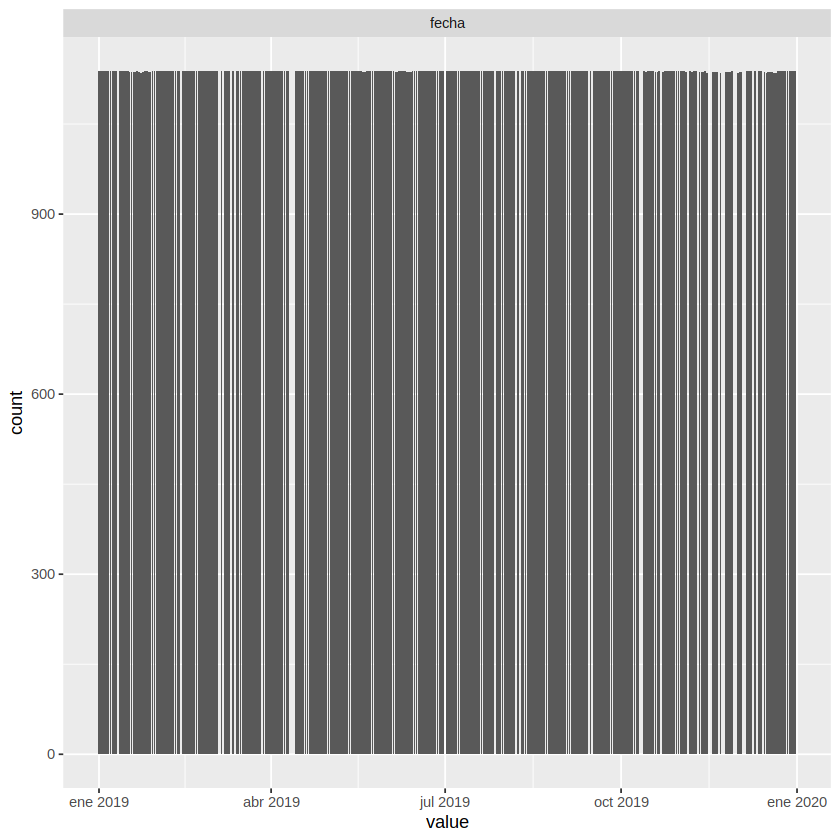

In [26]:
# returns a visualization of the number and frequency of categorical features
char_data |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_bar() +
  facet_wrap(~name, scales = "free")

## Statistical Normality Tests

In [27]:
cdata_long <- cdata |> 
  pivot_longer(cols = everything())

### Test de Shapiro-Wilk

Si hay muchos datos este no se puede hacer



In [29]:


# tapply(cdata_long$value, cdata_long$name, shapiro.test)




### Test de Anderson-Darling



In [30]:
tapply(cdata_long$value, cdata_long$name, ad.test)

$capacidad

	Anderson-Darling normality test

data:  X[[i]]
A = 19.676, p-value < 2.2e-16


$demanda

	Anderson-Darling normality test

data:  X[[i]]
A = 23950, p-value < 2.2e-16


$evento_infra

	Anderson-Darling normality test

data:  X[[i]]
A = 67855, p-value < 2.2e-16


$evento_zona

	Anderson-Darling normality test

data:  X[[i]]
A = 67855, p-value < 2.2e-16


$id_inf

	Anderson-Darling normality test

data:  X[[i]]
A = 4196.1, p-value < 2.2e-16


$prec

	Anderson-Darling normality test

data:  X[[i]]
A = 95062, p-value < 2.2e-16


$presMax

	Anderson-Darling normality test

data:  X[[i]]
A = 30902, p-value < 2.2e-16


$tmed

	Anderson-Darling normality test

data:  X[[i]]
A = 4371.6, p-value < 2.2e-16


$velmedia

	Anderson-Darling normality test

data:  X[[i]]
A = 8649.6, p-value < 2.2e-16



### Test de Lilliefors



In [31]:
tapply(cdata_long$value, cdata_long$name, lillie.test)

$capacidad

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.0084785, p-value < 2.2e-16


$demanda

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.18987, p-value < 2.2e-16


$evento_infra

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.34145, p-value < 2.2e-16


$evento_zona

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.3415, p-value < 2.2e-16


$id_inf

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.05765, p-value < 2.2e-16


$prec

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.36325, p-value < 2.2e-16


$presMax

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.23022, p-value < 2.2e-16


$tmed

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.084562, p-value < 2.2e-16


$velmedia

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.10176, p-value < 2.2e-16



### QQ-plots

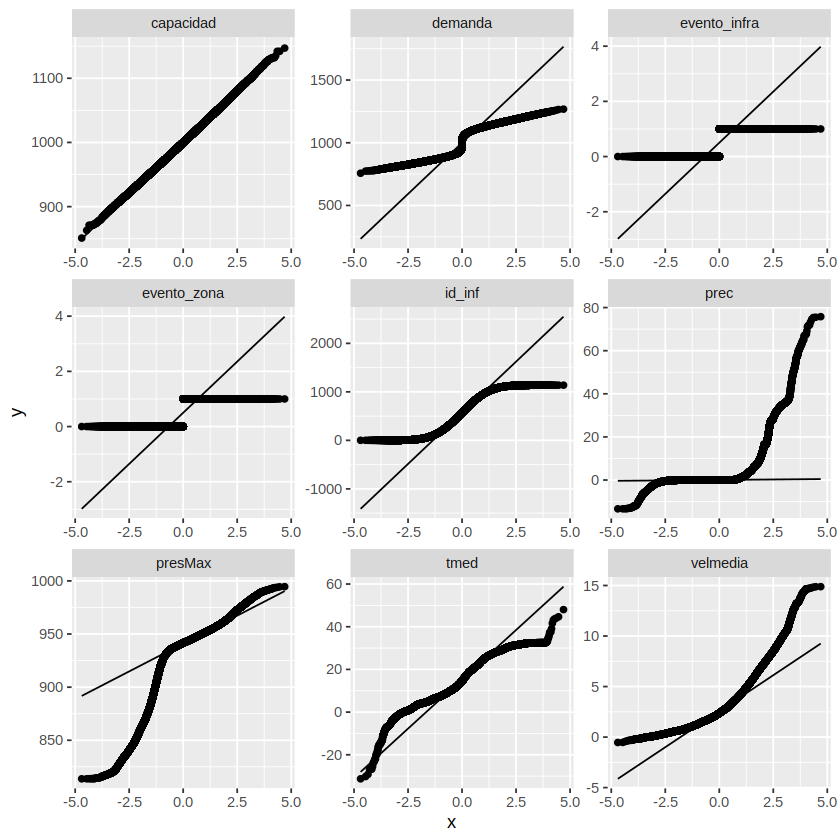

In [32]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(sample = value)) +
  geom_qq() +
  geom_qq_line() +
  facet_wrap(~name, scales = "free")

## Bivariate analysis

* Ver gráficos de dispersión y ggpairs arriba
* Completar si es necesario con alguna comparación específica (gráfico de dispersión o boxplot por grupos)

Correlaciones

In [33]:
cor(cdata, use = "pairwise.complete.obs")

,id_inf,capacidad,demanda,evento_infra,evento_zona,tmed,prec,velmedia,presMax
id_inf,1.000000e+00,0.0014906717,0.0008864349,9.826877e-06,-1.080539e-03,3.465725e-02,-1.387332e-02,-0.0560406305,0.1335515555
capacidad,1.490672e-03,1.0000000000,0.2743227533,-4.058876e-03,2.792731e-03,-2.719889e-03,4.568889e-04,-0.0013727245,0.0001555898
demanda,8.864349e-04,0.2743227533,1.0000000000,5.755948e-01,1.938094e-01,6.035635e-04,9.019087e-04,0.0012846329,-0.0024259930
evento_infra,9.826877e-06,-0.0040588765,0.5755948394,1.000000e+00,1.215669e-01,1.815032e-03,7.719077e-04,0.0017567425,-0.0019837193
evento_zona,-1.080539e-03,0.0027927308,0.1938094276,1.215669e-01,1.000000e+00,3.942121e-05,-1.025022e-05,0.0008905798,0.0013787969
tmed,3.465725e-02,-0.0027198891,0.0006035635,1.815032e-03,3.942121e-05,1.000000e+00,-1.400215e-01,0.0124078782,0.1426959354
prec,-1.387332e-02,0.0004568889,0.0009019087,7.719077e-04,-1.025022e-05,-1.400215e-01,1.000000e+00,0.1379943835,-0.1083912218
velmedia,-5.604063e-02,-0.0013727245,0.0012846329,1.756743e-03,8.905798e-04,1.240788e-02,1.379944e-01,1.0000000000,-0.1704607574
presMax,1.335516e-01,0.0001555898,-0.0024259930,-1.983719e-03,1.378797e-03,1.426959e-01,-1.083912e-01,-0.1704607574,1.0000000000


## Regression analysis

### Modelo completo regresión lineal simple

In [ ]:
# modelo <- lm(xxxx ~ ., data = cdata)
# summary(modelo)

In [ ]:
# plot(modelo)

### Selección de variables

Puede que dé error por la estructura de los datos, en ese caso dejarlo indicado

In [ ]:
# modelo2 <- step(modelo, trace = FALSE)
# summary(modelo2)


## Stationary analysis

- Si hay una variable fecha, usarla
- Si hay mes, o semana, convertir a fecha

Todas las series, probablemente habría que filtrar por geografía

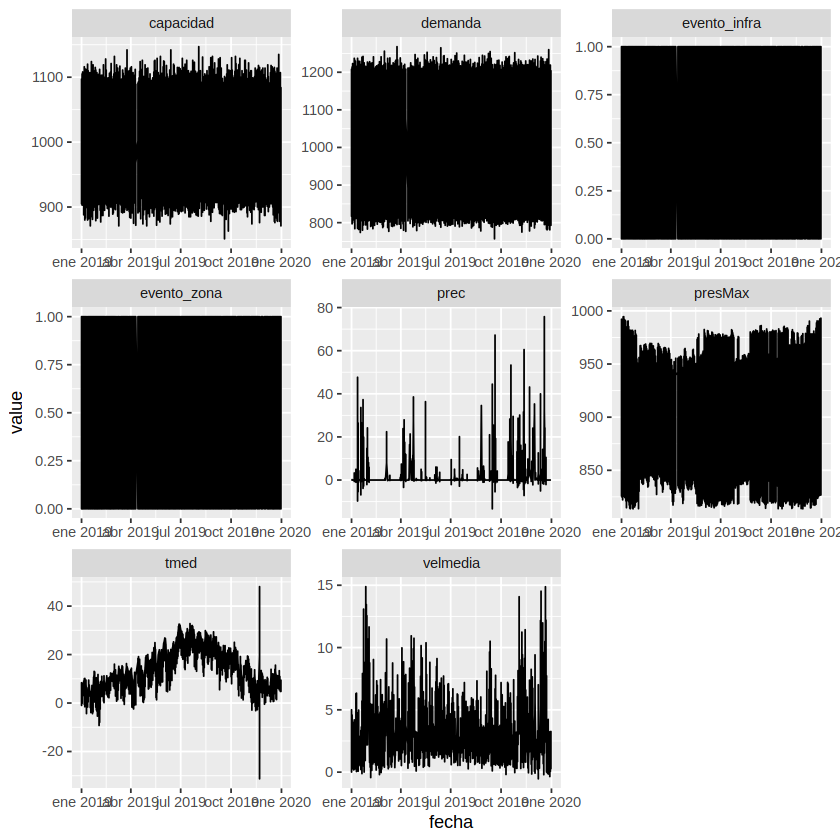

In [39]:
data |> 
  pivot_longer(cols = capacidad:presMax) |> 
  ggplot(aes(x = fecha, y = value)) +
  geom_line() +
  facet_wrap(~name, scales = "free")

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [40]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 12

In [41]:
caso <- "CU_18"
proceso <- '_12'
tarea <- "_20"
archivo <- ""
proper <- "_diario_infra"
extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [42]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [43]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [44]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Se ha realizado exploratorio de los datos del caso de uso

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos son adecuados para el caso de uso


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>